<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Elements of Linear Algebra



---



Key Concepts:


*   Linear Spaces
*   Orthogonality
*   Gram-Schmidt Process
*   Eigenvalues & Eigenvectors





#### Set up

In [51]:
import numpy as np
import matplotlib.pyplot as plt



---



###Linear Spaces

**Linear Subspace & Combination**

A linear subspace is the result of a linear combination, which is a new vector constructed by multiplying each vector in a subset by a constant and adding the result.





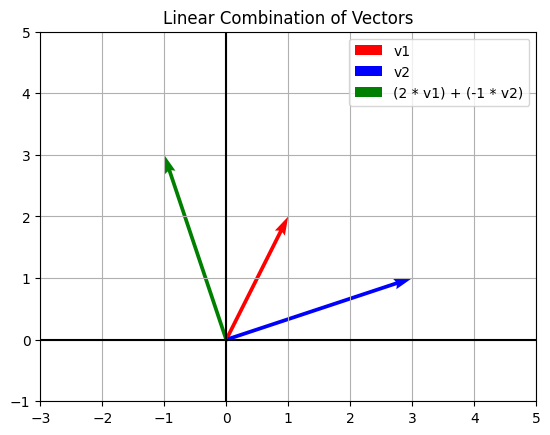

In [52]:
# Define two vectors
v1 = np.array([1, 2])
v2 = np.array([3, 1])

# Create linear combination
a, b = 2, -1
linearCombination = a * v1 + b * v2

# Plot
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.quiver(0, 0, linearCombination[0], linearCombination[1], angles='xy', scale_units='xy', scale=1, color='g', label='(2 * v1) + (-1 * v2)')

plt.xlim(-3, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.title('Linear Combination of Vectors')
plt.show()

**Span**

The span($w_1$,...,$w_m$) is the set of all linear combinations of $w_j$'s given that $w_1$,...,$w_m \epsilon V$. Every span is a linear subspace. The spanning set of $U$, a linear subspace, is the list of vectors that span  $U$.

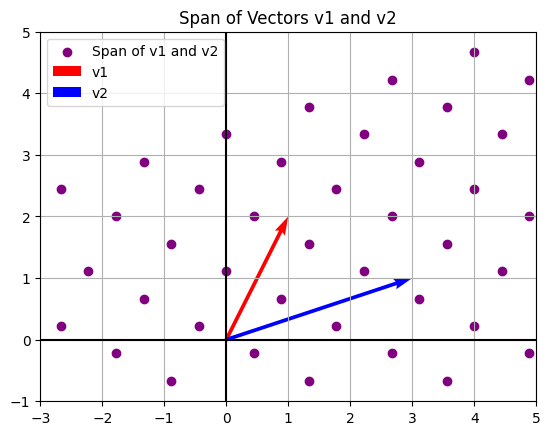

In [53]:
# Define the span of v1 and v2
span = [a * v1 + b * v2 for a in np.linspace(-2, 2, 10) for b in np.linspace(-2, 2, 10)]
span = np.array(span)

# Plot
plt.scatter(span[:, 0], span[:, 1], color='purple', label='Span of v1 and v2')
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

plt.xlim(-3, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(True)
plt.legend()
plt.title('Span of Vectors v1 and v2')
plt.show()

**Linear Independence**
If no vectors in a list can be written as linear combinations of the others, the list is linearly independent.

$$\forall i, \, u_i \notin \text{span}(\{u_j : j \neq i\}).$$

If a the vector list is not linear independent, it is linear dependent.


**Column Space**
The column space of a matrix is the set of all possible linear combinations of its column vectors (the span of the columns of a matrix).

**Basis**
A basis of a vector space is a set of linearly independent vectors that spans the entire space.

**Dimension**
The dimension of a matrix is the number of vectors in a basis for the space (rows * columns).

**Rank**
The rank of a matrix is the dimension of its column space.


In [54]:
def dependencyCheck(*vectors):
    matrix = np.column_stack(vectors)
    rank = np.linalg.matrix_rank(matrix)
    dimension = len(vectors[0])

    print(f"Dimension of the space: {dimension}")
    print(f"Rank of the matrix: {rank}")

    if rank == len(vectors):
        print("Linearly independent")
    else:
        print("Linearly dependent.")
    print()


# Examples
a = np.array([5, 15])
b = np.array([10, 30])
c = np.array([9, 15])

dependencyCheck(a, b)
dependencyCheck(a, c)
dependencyCheck(a, b, c)

Dimension of the space: 2
Rank of the matrix: 1
Linearly dependent.

Dimension of the space: 2
Rank of the matrix: 2
Linearly independent

Dimension of the space: 2
Rank of the matrix: 2
Linearly dependent.



###Orthogonality

Orthogonal vectors are perpendicular to each other. In other words, two vectors are orthogonal if their dot product is zero.

**Norm**

The norm of a vector is a measure of its length or magnitude:
$<u,v> = u \cdot v = \sum_i^n u_iv_i$

**Inner Product**

The inner product combines two vectors to produce a scalar:
$\|v\| = \sqrt {\sum_1^n u_i^2}$





In [55]:
# Define vectors u and v
u = np.array([2, 3])
v = np.array([4, 1])

# Calculate norm of vector v
norm_v = np.linalg.norm(v)

# Calculate inner product of u and v
inner_product = np.dot(u, v)

print(f"Vector u: {u}")
print(f"Vector v: {v}")
print(f"The norm of vector v (|v|) is: {norm_v:.2f}")
print(f"The inner product of u and v (<u, v>) is: {inner_product}")

Vector u: [2 3]
Vector v: [4 1]
The norm of vector v (|v|) is: 4.12
The inner product of u and v (<u, v>) is: 11


**Orthonormal Vectors**

A vector list is orthonomal or the vectors are pairwise orthogonal and each has norm 1.

**Best Approximation Theorem**
Given a linear subspace $U \subseteq V$ and vector $v \nsubseteq U$, this theorem helps us find the vector $v*$ in $U$ that is closest to $v$ in the norm, we want to solve:

$$ \min_{\mathbf{v}^* \in U} \|\mathbf{v}^* - \mathbf{v}\| $$

We use the Pythagorean theorem to prove optimality of $v*$ by getting:

$$ \|\mathbf{v} - \alpha \mathbf{u}_1\|^2 \geq \|\mathbf{v} - \mathbf{v}^*\|^2 $$




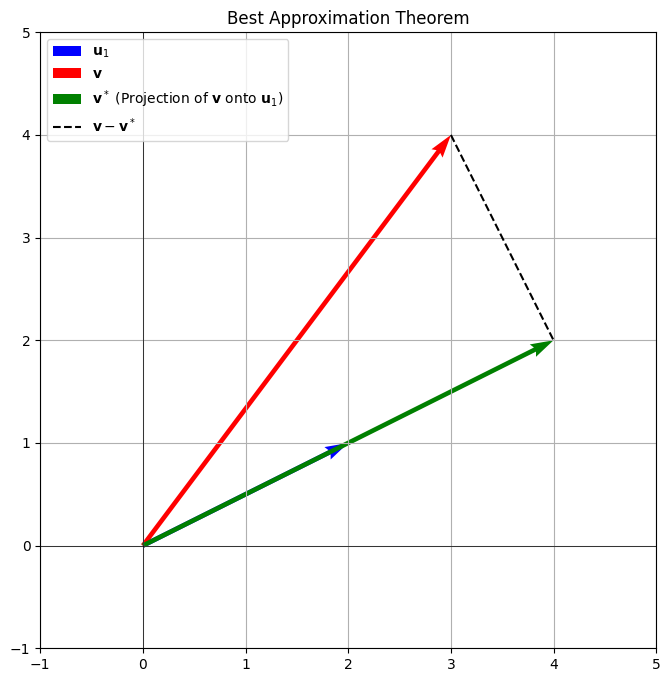

Norm of v - v*: 2.24
Norm of v - α u1: 2.24


In [56]:
v = np.array([3, 4])
u1 = np.array([2, 1])

# Compute projection of v onto u1
alpha = np.dot(v, u1) / np.dot(u1, u1)
v_star = alpha * u1
origin = np.array([0, 0])

# Compute the norm
norm1 = np.linalg.norm(v - v_star)
norm2 = np.linalg.norm(v - alpha * u1)

# Plot
plt.figure(figsize=(8, 8))
plt.quiver(*origin, *u1, angles='xy', scale_units='xy', scale=1, color='b', label=r'$\mathbf{u}_1$')
plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r', label=r'$\mathbf{v}$')
plt.quiver(*origin, *v_star, angles='xy', scale_units='xy', scale=1, color='g', label=r'$\mathbf{v}^*$ (Projection of $\mathbf{v}$ onto $\mathbf{u}_1$)')
plt.plot([v[0], v_star[0]], [v[1], v_star[1]], 'k--', label=r'$\mathbf{v} - \mathbf{v}^*$')

plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper left')
plt.title(r'Best Approximation Theorem')
plt.show()

print(f"Norm of v - v*: {norm1:.2f}")
print(f"Norm of v - α u1: {norm2:.2f}")


###Gram-Schmidt Process

The process is used to find an orthonormal basis from a set of linearly independent vectors. Basically, to find the basis the vectors are added one by one after taking out their orthogonal projection on the previously included vectors.

In [57]:
v1 = np.array([2, 1])
v2 = np.array([1, 2])

# Normalize v1 to get u1
u1 = v1 / np.linalg.norm(v1)

# Subtract the projection of v2 onto u1 from v2 to get orthogonal component
proj_v2_u1 = np.dot(v2, u1) * u1
u2_prime = v2 - proj_v2_u1

# Normalize u2_prime to get u2
u2 = u2_prime / np.linalg.norm(u2_prime)
u1 = np.round(u1, 5)
u2 = np.round(u2, 5)

print("Original vectors:")
print(f"v1 = {v1}")
print(f"v2 = {v2}\n")

print("Orthonormal basis vectors from GSP")
print(f"u1 = {u1}")
print(f"u2 = {u2}\n")

# Verification
dot_product = np.round(np.dot(u1, u2), 4)
norm_u1 = np.round(np.linalg.norm(u1), 4)
norm_u2 = np.round(np.linalg.norm(u2), 4)

print("Verification:")
print(f"u1 · u2 = {dot_product} (should be close to 0)")
print(f"||u1|| = {norm_u1} (should be 1)")
print(f"||u2|| = {norm_u2} (should be 1)")


Original vectors:
v1 = [2 1]
v2 = [1 2]

Orthonormal basis vectors from GSP
u1 = [0.89443 0.44721]
u2 = [-0.44721  0.89443]

Verification:
u1 · u2 = 0.0 (should be close to 0)
||u1|| = 1.0 (should be 1)
||u2|| = 1.0 (should be 1)


###Eigenvalues & Eigenvectors

**Eigenvalue & Eigenvector**

If $A  \epsilon  R^{dxd}$ is a square matrix, then $\lambda \epsilon R$ is an eigenvalue of A if there exists a nonzero vector $x \neq 0$ such that $Ax = \lambda x$. The nonzero vector $x$ is an eigenvector. The eigenvalue $\lambda$ represents a scalar that, when multiplied by the eigenvector $x$, gives the same result as applying the matrix $A$ to $x$. If $A$ is symmetric, then any two eigenvectors from distinct eigenspaces are orthogonal


In [58]:
A = np.array([[4, -1],
              [2, 1]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Matrix:")
print(A)

print("\nEigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Matrix:
[[ 4 -1]
 [ 2  1]]

Eigenvalues:
[3. 2.]

Eigenvectors:
[[0.70710678 0.4472136 ]
 [0.70710678 0.89442719]]


**Constrained Optimization**

$A$ is a $n\times n$ symmetric matrix $A$ with an orthogonal diagonalization $tA=PDP^{−1}$, and the columns of $P$ are orthonormal eigenvectors of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_1\leq\lambda_2,\dots\leq\lambda_n$. Then
$$\min_{x\neq 0}\frac{{x}^TA{x}}{{x}^T{x}}=\lambda_1$$
is achieved when ${x}={v}_1$ and  
$$\min_{x\neq 0}\frac{{x}^TA{x}}{{x}^T{x}}=\lambda_n$$
is achieved when ${x}={v}_n$.